In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.preprocessing import normalize
from scipy.special import expit as sigmoid
import sklearn.metrics as metrics

import seaborn as sns
import sys
print(sys.version_info.major,sys.version_info.minor) 

3 8


In [4]:
csv_path = "/home/jens/masterRepo/test/dataset/analysis_of_tp_and_fp_5.000000_5.000000_test.csv"
df = pd.read_csv(csv_path, dtype = {"objName":"category"})
df["visibleInlierFrac"] = df["visibleInliers"]/df["visiblePoints"]
df["visiblePointsFrac"] = df["visiblePoints"]/df["objectPoints"]
df["penetration"] = df[["penetrationInternal","penetrationExternal"]].max(axis=1)
df["intersectingInliers"] = df[["intersectingInliersInternal","intersectingInliersExternal"]].max(axis=1)
df["inCollision"] = df[["inCollisionInternal","inCollisionExternal"]].max(axis=1)
df["intersectingInliersFracintersectingInliersFracintersectingInliersFrac"] = df["intersectingInliers"] / df["visibleInliers"]
df["intersectingInliersInternalFrac"] = df["intersectingInliersInternal"] / df["visibleInliers"]
df["intersectingInliersExternalFrac"] = df["intersectingInliersExternal"] / df["visibleInliers"]
df["intersectingInliersSelectiveFrac"] =  (df["g"]*df["intersectingInliersInternalFrac"]) + ((1-df["g"])*df["inCollisionExternal"]*df["intersectingInliersExternalFrac"]) 
df["penetrationSelective"] =  (df["g"]*df["inCollisionInternal"]*df["penetrationInternal"]) + ((1-df["g"])*df["inCollisionExternal"]*df["penetrationExternal"]) 
df["bl"]= np.where(((df["objName"] == "AngleTubes") & (df["score"]>23.75))|
        ((df["objName"] == "Conrods") & (df["score"]>15.0))|
        ((df["objName"] == "Ears") & (df["score"]>16.5))|
        ((df["objName"] == "Gameboys") & (df["score"]>31.5)), True, False)

df[["visibleInlierFrac","visiblePointsFrac","penetration","intersectingInliers","inCollision","intersectingInliersSelectiveFrac","intersectingInliersInternalFrac","intersectingInliersExternalFrac"]]=df[["visibleInlierFrac","visiblePointsFrac","penetration","intersectingInliers","inCollision","intersectingInliersSelectiveFrac","intersectingInliersInternalFrac","intersectingInliersExternalFrac"]].fillna(0)

df_bl = df[ ((df["objName"] == "AngleTubes") & (df["score"]>23.75))|
            ((df["objName"] == "Conrods") & (df["score"]>15.0))|
            ((df["objName"] == "Ears") & (df["score"]>16.5))|
            ((df["objName"] == "Gameboys") & (df["score"]>31.5))]

objects = ["AngleTubes","Conrods","Ears","Gameboys"]
df.corrwith(df["g"]-0.5)

dpI                                                                     -0.137753
gI                                                                      -0.181912
g                                                                        1.000000
score                                                                    0.486681
visiblePoints                                                            0.027341
visibleInliers                                                           0.403323
inCollisionInternal                                                     -0.245829
inCollisionExternal                                                     -0.016697
penetrationInternal                                                      0.003792
penetrationExternal                                                     -0.188530
intersectingInliersInternal                                             -0.332358
intersectingInliersExternal                                             -0.012924
objectPoints    

In [9]:
print(">0",df[[df[intersectingInliersFracs"]>0]groupby("objName")..count(["dpI"])
print("=0",df[df["intersectingInliersFrac"]==0].groupby("objName").count()["dpI"]))

SyntaxError: invalid syntax (<ipython-input-9-9763263348de>, line 1)

In [10]:
df.groupby("objName").sum()


,dpI,gI,g,score,visiblePoints,visibleInliers,inCollisionInternal,inCollisionExternal,penetrationInternal,penetrationExternal,...,visiblePointsFrac,penetration,intersectingInliers,inCollision,intersectingInliersFracintersectingInliersFracintersectingInliersFrac,intersectingInliersInternalFrac,intersectingInliersExternalFrac,intersectingInliersSelectiveFrac,penetrationSelective,bl
objName,,,,,,,,,,,,,,,,,,,,,
AngleTubes,4175,9563,349,20038.48310,919605,527432,188,169,84.012193,106.135238,...,182.063948,180.775274,44597,310,54.216494,14.966421,42.056337,26.671416,20.516115,443
Conrods,6083,4412,225,10005.54670,723546,224702,278,269,279.652005,365.995223,...,213.561393,567.347188,44318,380,101.430989,42.028974,73.361168,48.076886,243.245730,302
Ears,3985,1165,71,3993.36021,576431,180384,117,64,30.510887,82.694584,...,150.937680,107.810649,48728,160,77.537142,59.834394,21.659236,16.534657,14.935331,86
Gameboys,1772,924,68,5582.56690,467497,237524,76,72,47.403761,70.720280,...,107.767865,108.708409,61937,117,51.442029,33.797841,22.803941,14.298780,26.924268,69


In [5]:
df_stat = pd.DataFrame()
df_stat["#S"] = df.groupby("objName")["dpI"].nunique()
df_stat["#h"] = df.groupby("objName")["gI"].count()
df_stat["$\overbar{#h}$"] = df_stat["#h"] /df_stat["#S"]
df_stat.index.name = None
print(df_stat.to_latex(index=True,float_format="%.1f"))

\begin{tabular}{lrrr}
\toprule
{} &  \#S &   \#h &  \$\textbackslash overbar\{\#h\}\$ \\
\midrule
AngleTubes &  16 &  560 &            35.0 \\
Conrods    &  27 &  480 &            17.8 \\
Ears       &  30 &  257 &             8.6 \\
Gameboys   &  19 &  191 &            10.1 \\
\bottomrule
\end{tabular}



In [9]:
df_stat = pd.DataFrame()
df_stat["#h"] = df.groupby("objName")["g"].count()
df_stat["#c"] = df[df["penetrationSelective"]>0].groupby("objName")["gI"].count()
#df_stat["#pd1"] = df[df["penetration"]>1].groupby("objName")["gI"].count()
#df_stat["#pd5"] = df[df["penetration"]>5].groupby("objName")["gI"].count()
df_stat["#ii"] = df[df["intersectingInliersSelectiveFrac"]>0].groupby("objName")["gI"].count()
#df_stat["#ii1"] = df[df["intersectingInliersFrac"]>0.05].groupby("objName")["gI"].count()

df.groupby("objName")["gI"].count()
df_stat

,#h,#c,#ii
objName,,,
AngleTubes,560,47,116
Conrods,480,167,164
Ears,257,21,45
Gameboys,191,31,42


<AxesSubplot:xlabel='penetration', ylabel='Count'>

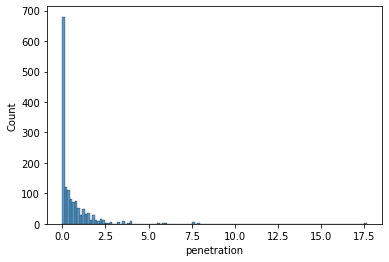

In [58]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
sns.histplot(data=df,x="penetration",)

In [5]:
result_dict = {"OBJ":[],"ACC":[],"PRE":[],"REC":[],"F1":[],"P":[],"N":[]}

for obj in objects:
    classification_report = metrics.classification_report(df[df["objName"]==obj]["g"].values,df[df["objName"]==obj]["bl"].values,output_dict=True)
    result_dict["OBJ"].append(obj)
    result_dict["ACC"].append(classification_report["accuracy"])
    result_dict["PRE"].append(classification_report["1"]["precision"])
    result_dict["REC"].append(classification_report["1"]["recall"])
    result_dict["F1"].append(classification_report["1"]["f1-score"])
    result_dict["P"].append(classification_report["1"]["support"])
    result_dict["N"].append(classification_report["0"]["support"])

result_df = pd.DataFrame(result_dict)
result_df["TOT"]=result_df["P"]+result_df["N"]
# print(result_df[["OBJ","P","N","TOT"]].to_latex(index=False,float_format="%.3f"))
print(result_df[["OBJ","ACC","PRE","REC","F1"]].to_latex(index=False,float_format="%.3f"))

\begin{tabular}{lrrrr}
\toprule
       OBJ &   ACC &   PRE &   REC &    F1 \\
\midrule
AngleTubes & 0.729 & 0.722 & 0.917 & 0.808 \\
   Conrods & 0.769 & 0.689 & 0.924 & 0.789 \\
      Ears & 0.741 & 0.500 & 0.648 & 0.564 \\
  Gameboys & 0.743 & 0.638 & 0.647 & 0.642 \\
\bottomrule
\end{tabular}



In [6]:
bl_stats = pd.DataFrame(df_bl[["objName","g"]].value_counts(sort=False).reset_index()).pivot(index="objName",columns="g",values=0).rename_axis(None,axis=1).reset_index()
bl_stats=bl_stats.rename(columns={1: "posetives", 0: "negatives"})
bl_stats["total"]=bl_stats["posetives"]+bl_stats["negatives"]
bl_stats["inCollision"]=df_bl.groupby("objName").sum()["inCollision"]
df_bl.groupby("objName").sum()["inCollision"]

objName
AngleTubes    238
Conrods       226
Ears           49
Gameboys       37
Name: inCollision, dtype: int64

In [7]:
result_dict = {"OBJ":[],"ACC":[],"PRE":[],"REC":[],"F1":[]}

for obj in objects:
    pred = df[df["objName"]==obj]["g"]
    classification_report = metrics.classification_report(df[df["objName"]==obj]["g"].values,pred,output_dict=True)
    result_dict["OBJ"].append(obj)
    result_dict["ACC"].append(classification_report["accuracy"])
    result_dict["PRE"].append(classification_report["1"]["precision"])
    result_dict["REC"].append(classification_report["1"]["recall"])
    result_dict["F1"].append(classification_report["1"]["f1-score"])


result_dict_bl = {"OBJ":[],"ACC":[],"PRE":[],"REC":[],"F1":[]}

for obj in objects:
    pred = df[df["objName"]==obj]
    idxs = pred.index[pred["bl"]==1]
    pred.loc[idxs,"bl"] = pred.loc[idxs,"g"].to_numpy()
    pred = pred["bl"].to_numpy(dtype=int)
    classification_report = metrics.classification_report(df[df["objName"]==obj]["g"].values,pred,output_dict=True)
    result_dict_bl["OBJ"].append(obj)
    result_dict_bl["ACC"].append(classification_report["accuracy"])
    result_dict_bl["PRE"].append(classification_report["1"]["precision"])
    result_dict_bl["REC"].append(classification_report["1"]["recall"])
    result_dict_bl["F1"].append(classification_report["1"]["f1-score"])
    


result_df = pd.DataFrame(result_dict)
result_df.set_index("OBJ",inplace=True)
result_df.columns = pd.MultiIndex.from_product([['A1'],result_df.columns])

result_bl_df= pd.DataFrame(result_dict_bl)
result_bl_df.set_index("OBJ",inplace=True)
result_bl_df.columns = pd.MultiIndex.from_product([['A2'],result_bl_df.columns])

result_df = result_df.join(result_bl_df,sort=True)
result_df.index.name = None
print(result_df.to_latex(index=True,float_format="%.3f"))
result_df#.to_latex(index=False)


\begin{tabular}{lrrrrrrrr}
\toprule
{} & \multicolumn{4}{l}{A1} & \multicolumn{4}{l}{A2} \\
{} &   ACC &   PRE &   REC &    F1 &   ACC &   PRE &   REC &    F1 \\
\midrule
AngleTubes & 1.000 & 1.000 & 1.000 & 1.000 & 0.948 & 1.000 & 0.917 & 0.957 \\
Conrods    & 1.000 & 1.000 & 1.000 & 1.000 & 0.965 & 1.000 & 0.924 & 0.961 \\
Ears       & 1.000 & 1.000 & 1.000 & 1.000 & 0.909 & 1.000 & 0.648 & 0.786 \\
Gameboys   & 1.000 & 1.000 & 1.000 & 1.000 & 0.874 & 1.000 & 0.647 & 0.786 \\
\bottomrule
\end{tabular}

/home/jens/.virtualenvs/master/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/home/jens/.virtualenvs/master/lib/python3.8/site-packages/pan

A1                       A2                         
            ACC  PRE  REC   F1       ACC  PRE       REC        F1
AngleTubes  1.0  1.0  1.0  1.0  0.948214  1.0  0.916905  0.956652
Conrods     1.0  1.0  1.0  1.0  0.964583  1.0  0.924444  0.960739
Ears        1.0  1.0  1.0  1.0  0.908759  1.0  0.647887  0.786325
Gameboys    1.0  1.0  1.0  1.0  0.874346  1.0  0.647059  0.785714

In [8]:
result_dict = {"OBJ":[],"ACC":[],"PRE":[],"REC":[],"F1":[],"P":[],"N":[]}

for obj in objects:
    pred = df[df["objName"]==obj]
    # idxs = pred.index[(pred["intersectingInliersSelectiveFrac"]>=0) & pred["bl"] == 1]
    idxs = pred.index[(pred["penetrationSelective"]>=0)& pred["bl"] == 1]

    pred.loc[idxs,"bl"] = pred.loc[idxs,"g"].to_numpy()
    pred = pred["bl"].to_numpy(dtype=int)
    classification_report = metrics.classification_report(df[df["objName"]==obj]["g"].values,pred,output_dict=True)
    result_dict["OBJ"].append(obj)
    result_dict["ACC"].append(classification_report["accuracy"])
    result_dict["PRE"].append(classification_report["1"]["precision"])
    result_dict["REC"].append(classification_report["1"]["recall"])
    result_dict["F1"].append(classification_report["1"]["f1-score"])
    result_dict["P"].append(classification_report["1"]["support"])
    result_dict["N"].append(classification_report["0"]["support"])

result_df = pd.DataFrame(result_dict)
result_df["TOT"]=result_df["P"]+result_df["N"]
print(result_df[["OBJ","ACC","PRE","REC","F1"]].to_latex(index=False,float_format="%.3f"))
result_df#.to_latex(index=False)

\begin{tabular}{lrrrr}
\toprule
       OBJ &   ACC &   PRE &   REC &    F1 \\
\midrule
AngleTubes & 0.948 & 1.000 & 0.917 & 0.957 \\
   Conrods & 0.965 & 1.000 & 0.924 & 0.961 \\
      Ears & 0.909 & 1.000 & 0.648 & 0.786 \\
  Gameboys & 0.874 & 1.000 & 0.647 & 0.786 \\
\bottomrule
\end{tabular}

/home/jens/.virtualenvs/master/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/home/jens/.virtualenvs/master/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

,OBJ,ACC,PRE,REC,F1,P,N,TOT
0,AngleTubes,0.948214,1.0,0.916905,0.956652,349,211,560
1,Conrods,0.964583,1.0,0.924444,0.960739,225,255,480
2,Ears,0.908759,1.0,0.647887,0.786325,71,203,274
3,Gameboys,0.874346,1.0,0.647059,0.785714,68,123,191


In [9]:
result_dict = {"objName":[],"accuracy":[],"precision":[],"recall":[],"f1":[],"posetives":[],"negatives":[]}

for obj in objects:
    classification_report = metrics.classification_report(df[df["objName"]==obj]["g"].values,df[df["objName"]==obj]["bl"].values,output_dict=True)
    result_dict["objName"].append(obj)
    result_dict["accuracy"].append(classification_report["accuracy"])
    result_dict["precision"].append(classification_report["1"]["precision"])
    result_dict["recall"].append(classification_report["1"]["recall"])
    result_dict["f1"].append(classification_report["1"]["f1-score"])
    result_dict["posetives"].append(classification_report["1"]["support"])
    result_dict["negatives"].append(classification_report["0"]["support"])

result_df = pd.DataFrame(result_dict)
result_df["total"]=result_df["posetives"]+result_df["negatives"]
result_df#.to_latex(index=False)

,objName,accuracy,precision,recall,f1,posetives,negatives,total
0,AngleTubes,0.728571,0.722348,0.916905,0.808081,349,211,560
1,Conrods,0.768750,0.688742,0.924444,0.789374,225,255,480
2,Ears,0.740876,0.500000,0.647887,0.564417,71,203,274
3,Gameboys,0.743455,0.637681,0.647059,0.642336,68,123,191


In [10]:
df_a = df_bl.groupby(["objName","g"]).mean()[["score","penetrationSelective","intersectingInliersSelectiveFrac"]]
df_a["intersectingInliersSelectiveFracstd"] = df_bl.groupby(["objName","g"]).std()["intersectingInliersSelectiveFrac"]
df_a["intersectingInliersSelectiveFracmax"] = df_bl.groupby(["objName","g"]).max()["intersectingInliersSelectiveFrac"]
df_a["penetrationSelectivestd"] = df_bl.groupby(["objName","g"]).std()["penetrationSelective"]
df_a["penetrationSelectivemax"] = df_bl.groupby(["objName","g"]).max()["penetrationSelective"]
df_a.reset_index(inplace=True)


for obj in ["AngleTubes","Conrods","Ears","Gameboys"]:
    iis = df_a[(df_a["objName"]==obj) & (df_a["g"]==0)]["intersectingInliersSelectiveFrac"]
    iis_max = df_a[(df_a["objName"]==obj) & (df_a["g"]==1)]["intersectingInliersSelectiveFracmax"]
    pen = df_a[(df_a["objName"]==obj) & (df_a["g"]==0)]["penetrationSelective"]
    pen_max = df_a[(df_a["objName"]==obj) & (df_a["g"]==1)]["penetrationSelectivemax"]

    print(iis.values[0],iis_max.values[0],pen.values[0],pen_max.values[0])
df_a.head()

0.055485296851300415 0.010558069381598794 0.019069056910569107 1.80208
0.22120181550523393 0.03582554517133956 0.6421630244680854 17.6351
0.009981682925506283 0.557345971563981 0.09131621956521738 0.0
0.13145166887878643 0.10689869484151647 0.17772768 1.42624


,objName,g,score,penetrationSelective,intersectingInliersSelectiveFrac,intersectingInliersSelectiveFracstd,intersectingInliersSelectiveFracmax,penetrationSelectivestd,penetrationSelectivemax
0,AngleTubes,0,37.476040,0.019069,0.055485,0.186286,0.733766,0.164127,1.77867
1,AngleTubes,1,41.632077,0.034931,0.000470,0.001408,0.010558,0.169098,1.80208
2,Conrods,0,23.026136,0.642163,0.221202,0.306545,0.887500,2.035909,17.63510
3,Conrods,1,27.679247,0.330256,0.001117,0.003706,0.035826,1.430350,17.63510
4,Ears,0,21.126567,0.091316,0.009982,0.051879,0.348739,0.479961,3.20613


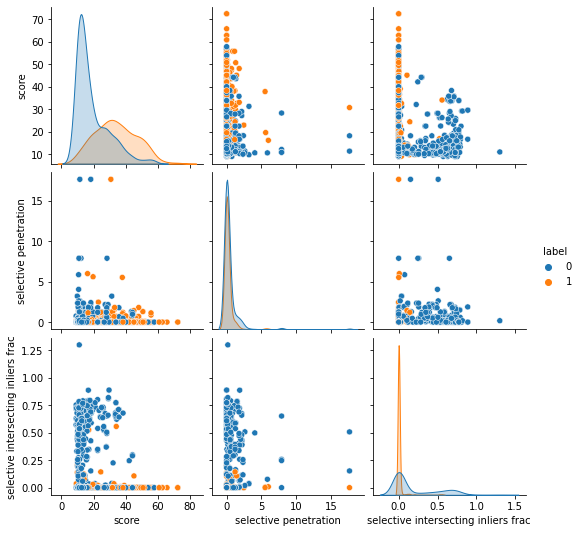

In [11]:
df_rn=df.rename(columns={"g": "label","penetrationSelective":"selective penetration","intersectingInliersSelectiveFrac":"selective intersecting inliers frac"})
g = sns.pairplot(df_rn[df_rn["inCollision"]==1],vars = ["score","selective penetration","selective intersecting inliers frac"], hue="label",kind="scatter")



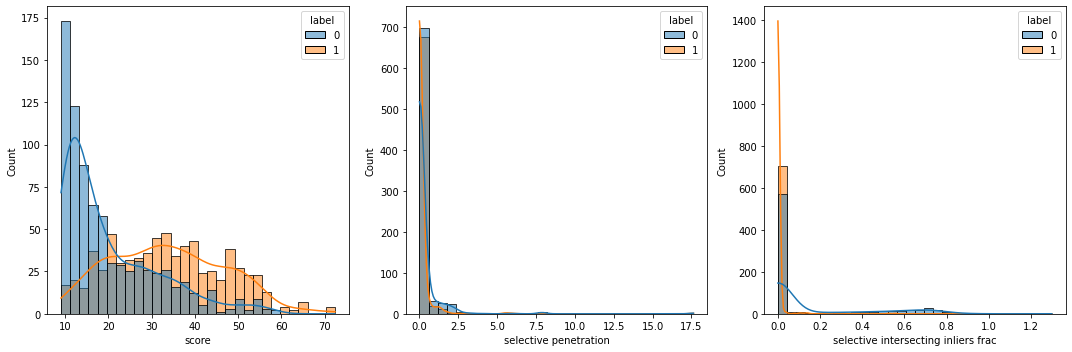

In [12]:
fig,axes = plt.subplots(1,3,figsize=(15,5))
sns.histplot(kde=True,bins=30,data=df_rn,x="score",hue="label",ax=axes[0])
sns.histplot(kde=True,bins=30,data=df_rn,x="selective penetration",hue="label",ax=axes[1])
sns.histplot(kde=True,bins=30,data=df_rn,x="selective intersecting inliers frac",hue="label",ax=axes[2])
plt.tight_layout()
plt.savefig('report/global_hist_kde_all.pdf', format='pdf')

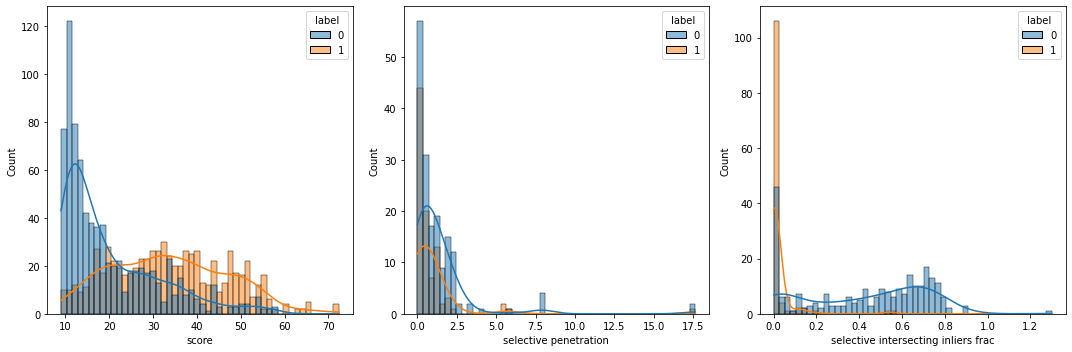

In [22]:
fig,axes = plt.subplots(1,3,figsize=(15,5))
sns.histplot(kde=True,bins=50,data=df_rn,x="score",hue="label",ax=axes[0])
sns.histplot(kde=True,bins=50,data=df_rn[df_rn["selective penetration"]>0],x="selective penetration",hue="label",ax=axes[1])
sns.histplot(kde=True,bins=50,data=df_rn[df_rn["selective intersecting inliers frac"]>0],x="selective intersecting inliers frac",hue="label",ax=axes[2])
plt.tight_layout()
plt.savefig('report/global_hist_kde_all_factor_non_zero.pdf', format='pdf')

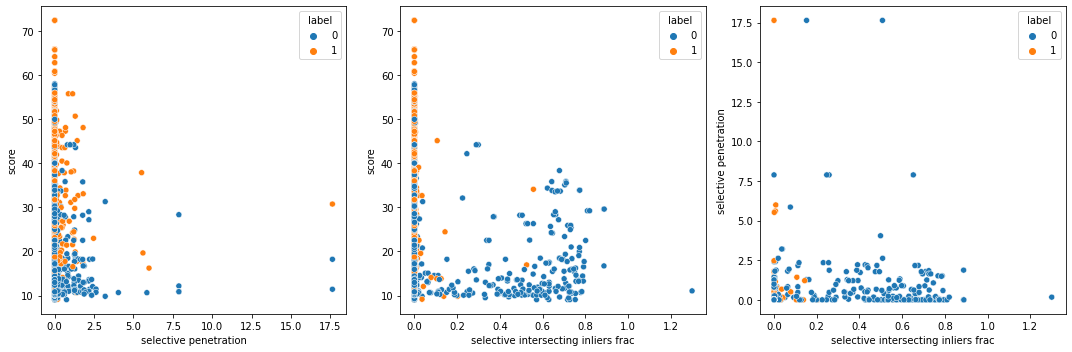

In [14]:
fig,axes = plt.subplots(1,3,figsize=(15,5))
sns.scatterplot(data=df_rn,x="selective penetration",y="score",hue="label",ax=axes[0])
sns.scatterplot(data=df_rn,x="selective intersecting inliers frac",y="score",hue="label",ax=axes[1])
sns.scatterplot(data=df_rn,x="selective intersecting inliers frac",y="selective penetration",hue="label",ax=axes[2])
plt.tight_layout()
plt.savefig('report/global_scatter.pdf', format='pdf')


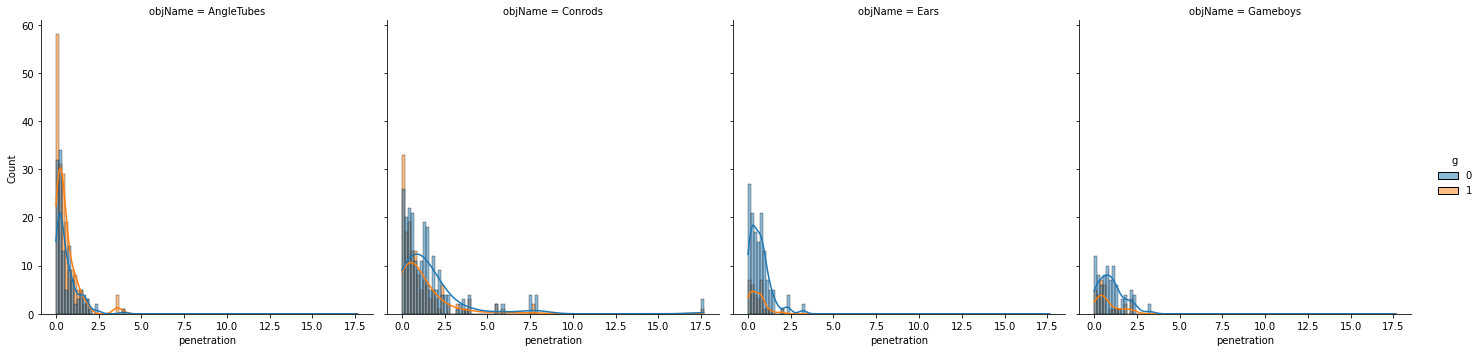

In [25]:
g=sns.displot(df[df["penetration"]>0], x="penetration", hue="g",col="objName",kde=True, kind="hist",bins=100, fill=True)


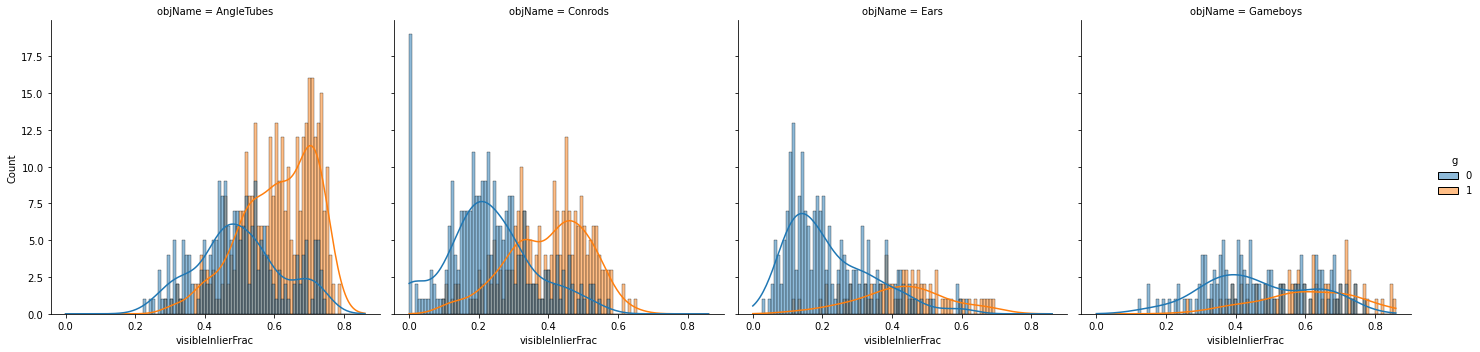

In [18]:
#g=sns.displot(df_bl[df_bl["intersectingInliersSelectiveFrac"]>0], x="intersectingInliersSelectiveFrac", hue="g",col="objName", kind="kde", fill=True)

g=sns.displot(df, x="visibleInlierFrac", hue="g",col="objName",kde=True, kind="hist",bins=100, fill=True)


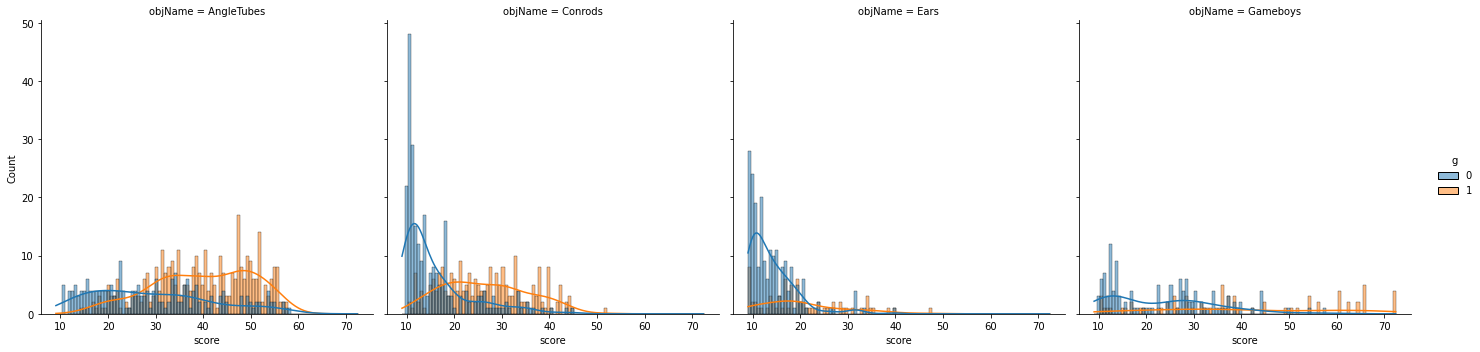

In [21]:
g=sns.displot(df, x="score", hue="g",col="objName",kde=True, kind="hist",bins=100, fill=True)


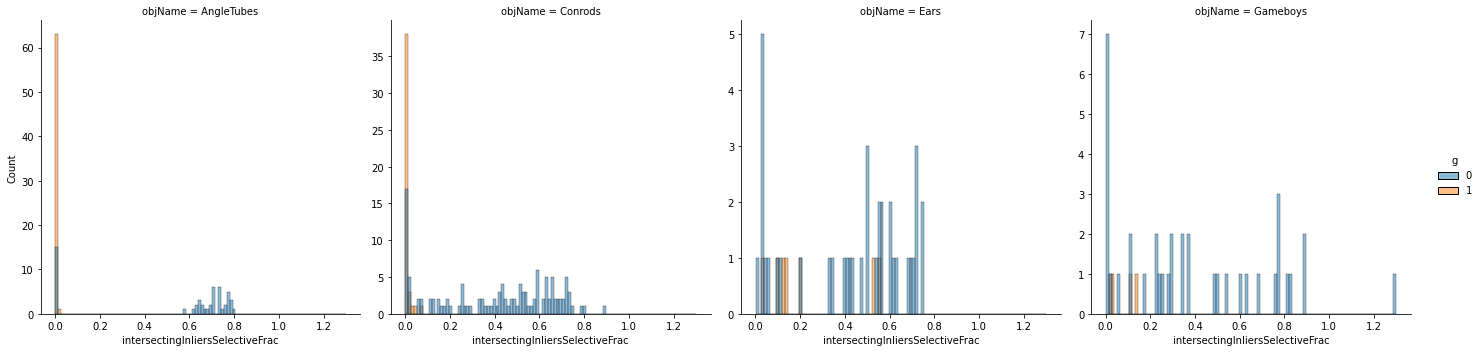

In [31]:
g=sns.displot(df[df["intersectingInliersSelectiveFrac"]>0], x="intersectingInliersSelectiveFrac", hue="g",col="objName", kind="hist",bins=100, fill=True,facet_kws={"sharex":False,"sharey":False})


In [32]:
df_bl_f = df_bl[df_bl["intersectingInliersSelectiveFrac"]<0.003]
df_bl_f.groupby("objName").mean()


,dpI,gI,g,score,visiblePoints,visibleInliers,inCollisionInternal,inCollisionExternal,penetrationInternal,penetrationExternal,...,visiblePointsFrac,penetration,intersectingInliers,inCollision,intersectingInliersFrac,intersectingInliersInternalFrac,intersectingInliersExternalFrac,intersectingInliersSelectiveFrac,penetrationSelective,bl
objName,,,,,,,,,,,,,,,,,,,,,
AngleTubes,7.335766,13.238443,0.739659,40.852631,1654.257908,1011.554745,0.323601,0.245742,0.125482,0.192807,...,0.327511,0.302771,49.768856,0.501217,0.045530,0.010138,0.035426,0.000160,0.027024,True
Conrods,12.610169,4.957627,0.779661,27.223407,1519.114407,605.707627,0.398305,0.478814,0.486874,0.346824,...,0.448381,0.777070,78.169492,0.677966,0.132377,0.034725,0.097744,0.000149,0.231355,True
Ears,15.023256,3.127907,0.511628,22.832273,2568.534884,1046.546512,0.290698,0.220930,0.111236,0.178500,...,0.672567,0.284908,237.372093,0.500000,0.251669,0.198406,0.053263,0.000000,0.007558,True
Gameboys,8.983333,1.416667,0.700000,48.180125,2446.066667,1529.933333,0.166667,0.333333,0.254264,0.199569,...,0.563870,0.441455,252.233333,0.466667,0.184171,0.084440,0.099731,0.000000,0.029872,True


In [33]:
df_bl.groupby("objName").mean()

,dpI,gI,g,score,visiblePoints,visibleInliers,inCollisionInternal,inCollisionExternal,penetrationInternal,penetrationExternal,...,visiblePointsFrac,penetration,intersectingInliers,inCollision,intersectingInliersFrac,intersectingInliersInternalFrac,intersectingInliersExternalFrac,intersectingInliersSelectiveFrac,penetrationSelective,bl
objName,,,,,,,,,,,,,,,,,,,,,
AngleTubes,7.239278,13.557562,0.722348,40.478144,1653.555305,1005.119639,0.343115,0.270880,0.127669,0.192994,...,0.327372,0.304871,62.331828,0.537246,0.059688,0.011906,0.049393,0.015745,0.030527,True
Conrods,12.519868,5.586093,0.688742,26.230928,1518.324503,586.586093,0.493377,0.559603,0.569282,0.543095,...,0.448148,0.984132,100.453642,0.748344,0.183523,0.043716,0.151469,0.069117,0.427340,True
Ears,15.478261,3.206522,0.500000,22.836546,2568.913043,1043.489130,0.336957,0.250000,0.112631,0.213599,...,0.672666,0.318708,267.369565,0.532609,0.277452,0.224237,0.054781,0.016761,0.045658,True
Gameboys,9.217391,1.681159,0.637681,47.012562,2434.000000,1525.130435,0.217391,0.405797,0.294174,0.229056,...,0.561088,0.491495,320.333333,0.536232,0.230343,0.099609,0.144582,0.049464,0.085064,True
